In [1]:
!pip install darts


     |████████████████████████████████| 253 kB 4.0 MB/s 
     |████████████████████████████████| 2.0 MB 43.7 MB/s 
     |████████████████████████████████| 9.8 MB 43.5 MB/s 
     |████████████████████████████████| 790 kB 57.0 MB/s 
     |████████████████████████████████| 62 kB 646 kB/s 
     |████████████████████████████████| 177 kB 69.0 MB/s 
     |████████████████████████████████| 804.1 MB 1.9 kB/s 
     |████████████████████████████████| 22.3 MB 103.4 MB/s 
     |████████████████████████████████| 1.4 MB 45.8 MB/s 
     |████████████████████████████████| 10.3 MB 39.4 MB/s 
     |████████████████████████████████| 9.9 MB 47.0 MB/s 
     |████████████████████████████████| 155 kB 48.0 MB/s 
     |████████████████████████████████| 38.2 MB 25 kB/s 
     |████████████████████████████████| 65 kB 3.6 MB/s 
     |████████████████████████████████| 374 kB 53.3 MB/s 
     |████████████████████████████████| 49 kB 4.5 MB/s 
     |████████████████████████████████| 214 kB 70.5 MB/s 
  Created wheel fo

In [1]:
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset

In [2]:
AirPassengersDataset().load().pd_series()

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Freq: MS, Length: 144, dtype: float64

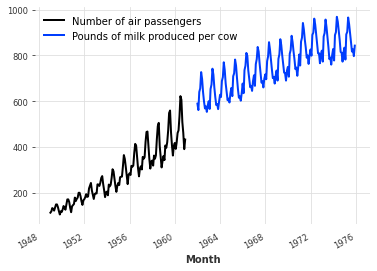

In [3]:
import matplotlib.pyplot as plt
series_air = AirPassengersDataset().load()
series_milk = MonthlyMilkDataset().load()

series_air.plot(label='Number of air passengers')
series_milk.plot(label='Pounds of milk produced per cow')
plt.legend();

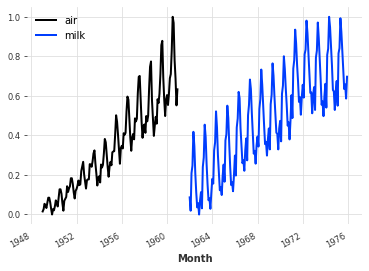

In [4]:
from darts.dataprocessing.transformers import Scaler
scaler_air, scaler_milk = Scaler(), Scaler()
series_air_scaled = scaler_air.fit_transform(series_air)
series_milk_scaled = scaler_milk.fit_transform(series_milk)

series_air_scaled.plot(label='air')
series_milk_scaled.plot(label='milk')
plt.legend();

In [5]:
# Train And Validation Split
train_air, val_air = series_air_scaled[:-36], series_air_scaled[-36:]
train_milk, val_milk = series_milk_scaled[:-36], series_milk_scaled[-36:]

In [6]:
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape

In [7]:
model_air_milk = NBEATSModel(input_chunk_length=36, output_chunk_length=18, n_epochs=150, random_state=0)

In [8]:
model_air_milk.fit([train_air, train_milk], verbose=True)

[2021-11-07 09:40:23,661] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 158 samples.
[2021-11-07 09:40:23,661] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 158 samples.
[2021-11-07 09:40:23,786] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-11-07 09:40:23,786] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
  1%|          | 1/150 [00:02<04:58,  2.01s/it]

  7%|▋         | 11/150 [00:19<03:54,  1.69s/it]

 14%|█▍        | 21/150 [00:46<07:20,  3.42s/it]

 21%|██        | 31/150 [01:23<06:49,  3.44s/it]

 27%|██▋       | 41/150 [01:43<03:17,  1.81s/it]

 34%|███▍      | 51/150 [02:01<02:46,  1.68s/it]

 41%|████      | 61/150 [02:22<03:30,  2.37s/it]

 47%|████▋     | 71/150 [02:47<03:15,  2.47s/it]

 54%|█████▍    | 81/150 [03:15<03:48,  3.31s/it]

 61%|██████    | 91/150 [03:38<02:30,  2.55s/it]

 67%|██████▋   | 101/150 [04:02<01:52,  2.30s/it]

 74%|███████▍  | 111/150 [04:28<01:28,  2.26s/it]

 81%|████████  | 121/150 [04:54<01:14,  2.56s/it]

 87%|████████▋ | 131/150 [05:19<00:53,  2.82s/it]

 94%|█████████▍| 141/150 [05:44<00:23,  2.59s/it]

100%|██████████| 150/150 [06:06<00:00,  2.44s/it]


MAPE = 4.79%


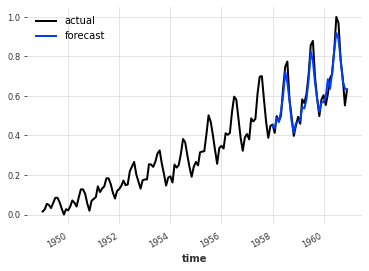

In [9]:
pred = model_air_milk.predict(n=36, series=train_air)

series_air_scaled.plot(label='actual')
pred.plot(label='forecast')
plt.legend();
print('MAPE = {:.2f}%'.format(mape(series_air_scaled, pred)))

MAPE = 50.02%


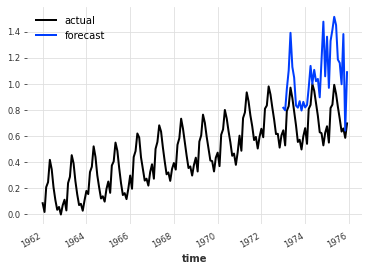

In [10]:
pred = model_air_milk.predict(n=36, series=train_milk)

series_milk_scaled.plot(label='actual')
pred.plot(label='forecast')
plt.legend();
print('MAPE = {:.2f}%'.format(mape(series_milk_scaled, pred)))